<a href="https://colab.research.google.com/github/Shivam-Ra/EDA/blob/main/Module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-1219de811539>:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(result[:, 0], result[:, 1], cmap='viridis')


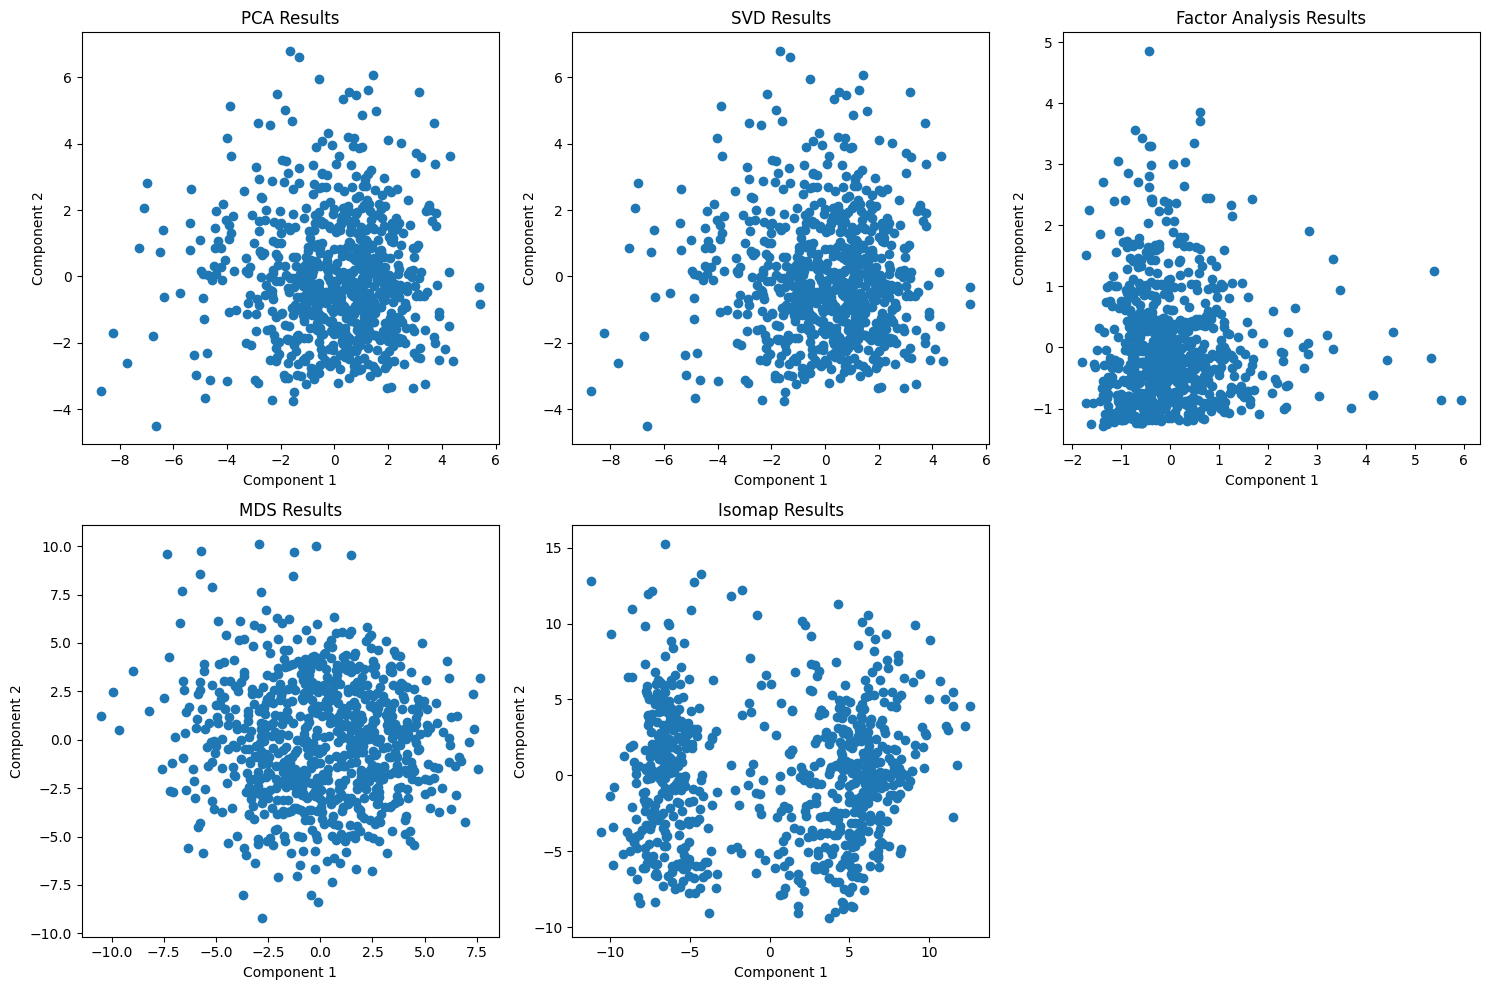

In [5]:
import pandas as pd
from sklearn.decomposition import PCA, FactorAnalysis, TruncatedSVD
from sklearn.manifold import MDS, Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data
data= pd.read_csv('/content/mroz (1).csv')


# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Dictionary to store results for each method
results = {}

# 1. Principal Component Analysis (PCA)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
results['PCA'] = data_pca

# 2. Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2)
data_svd = svd.fit_transform(data_scaled)
results['SVD'] = data_svd

# 3. Factor Analysis
fa = FactorAnalysis(n_components=2)
data_fa = fa.fit_transform(data_scaled)
results['Factor Analysis'] = data_fa

# 4. Multidimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=0)
data_mds = mds.fit_transform(data_scaled)
results['MDS'] = data_mds

# 5. Isomap (Manifold Learning)
isomap = Isomap(n_components=2)
data_isomap = isomap.fit_transform(data_scaled)
results['Isomap'] = data_isomap

# Plotting results
plt.figure(figsize=(15, 10))
for i, (method, result) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(result[:, 0], result[:, 1], cmap='viridis')
    plt.title(f'{method} Results')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
plt.tight_layout()
plt.show()
